In [9]:
# Data Preprocessing:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_excel(r'/content/EastWestAirlines.xlsx', sheet_name='data')

# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

# Handling missing values (if any)
# Assuming there are no missing values based on the dataset's typical structure

# Remove outliers (if necessary)
# For simplicity, assuming outliers are not severe and do not require removal

# Scale the features if necessary (optional)
# Scale numerical features except for ID and Balance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.iloc[:, 1:])

# Convert scaled features back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=data.columns[1:])

# Display the scaled DataFrame
print("\nScaled Data:")
print(scaled_df.head())

Missing values in the dataset:
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

Scaled Data:
    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4  0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.104065          -0.328603        -0.362168           1.395454   
1    -0.999926          -0.328603        -0.362168           1.379957   
2    -0.


Summary Statistics:
            Balance    Qual_miles     cc1_miles     cc2_miles     cc3_miles  \
count  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03  3.999000e+03   
mean   2.842882e-17  6.574164e-17  1.705729e-16  3.038330e-16  1.350369e-16   
std    1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00  1.000125e+00   
min   -7.304396e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
25%   -5.465676e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
50%   -3.027332e-01 -1.862987e-01 -7.695784e-01 -9.824189e-02 -6.276658e-02   
75%    1.866028e-01 -1.862987e-01  6.831212e-01 -9.824189e-02 -6.276658e-02   
max    1.618884e+01  1.422486e+01  2.135821e+00  1.344898e+01  2.042732e+01   

        Bonus_miles   Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3.999000e+03  3.999000e+03        3999.000000     3.999000e+03   
mean  -2.842882e-17 -7.817925e-17           0.000000     1.776801e-17   
std    1.000125e+00  1.000125e+00           1.00

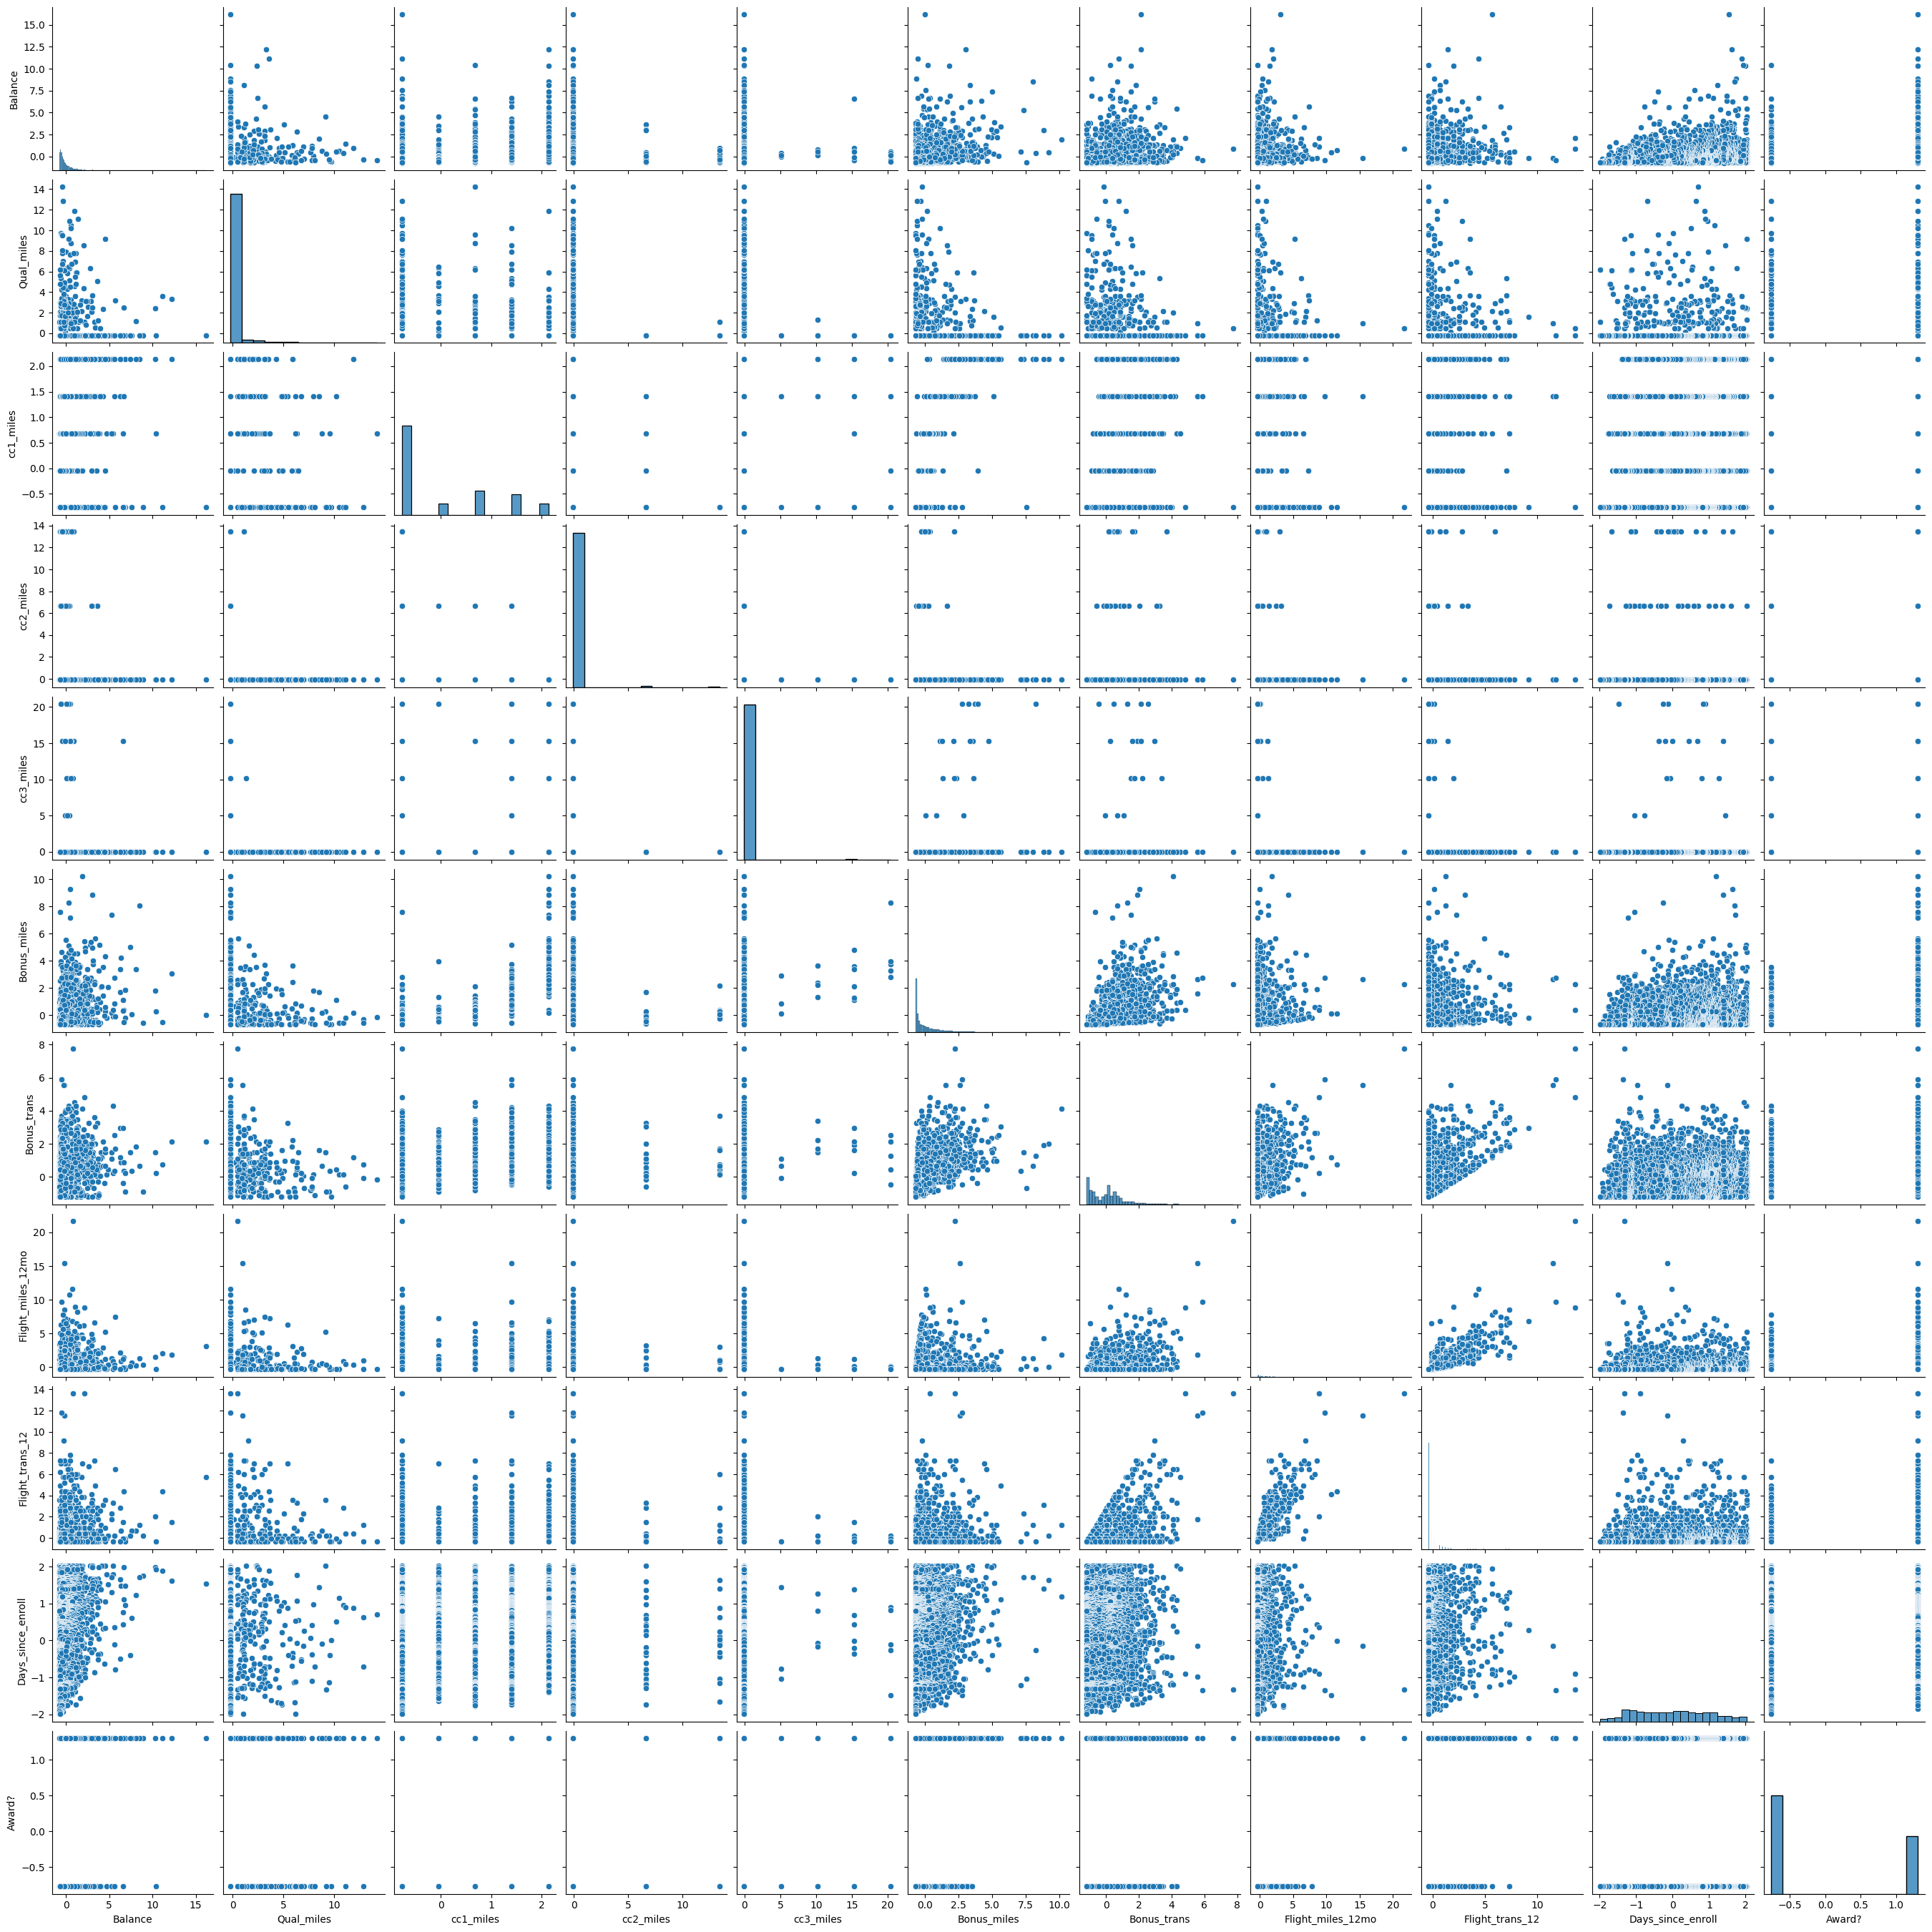

In [10]:
# Performing EDA to understand the distribution of data and identify potential clusters:
# Summary statistics
print("\nSummary Statistics:")
print(scaled_df.describe())

# Pairplot for visualizing relationships
sns.pairplot(scaled_df)
plt.show()

In [3]:
#K-MEANS
# Implementing K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_df)

# Getting cluster labels and centroids
kmeans_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Evaluate clustering using silhouette score
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
print(f"\nK-Means Silhouette Score: {kmeans_silhouette:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



K-Means Silhouette Score: 0.3076


In [4]:
# Implementing Hierarchical clustering
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_cluster.fit(scaled_df)

# Getting cluster labels
agg_labels = agg_cluster.labels_

# Evaluate clustering using silhouette score
agg_silhouette = silhouette_score(scaled_df, agg_labels)
print(f"\nHierarchical Clustering Silhouette Score: {agg_silhouette:.4f}")


Hierarchical Clustering Silhouette Score: 0.3081


In [5]:
# Implementing DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Evaluate clustering using silhouette score
dbscan_silhouette = silhouette_score(scaled_df, dbscan_labels)
print(f"\nDBSCAN Silhouette Score: {dbscan_silhouette:.4f}")


DBSCAN Silhouette Score: -0.0783


In [6]:
# Adding cluster labels to the original dataset
data['KMeans_Cluster'] = kmeans_labels
data['Hierarchical_Cluster'] = agg_labels
data['DBSCAN_Cluster'] = dbscan_labels

# Analyzing cluster characteristics
cluster_summary_kmeans = data.groupby('KMeans_Cluster').mean()
cluster_summary_agg = data.groupby('Hierarchical_Cluster').mean()
cluster_summary_dbscan = data.groupby('DBSCAN_Cluster').mean()

print("\nK-Means Cluster Summary:")
print(cluster_summary_kmeans)

print("\nHierarchical Cluster Summary:")
print(cluster_summary_agg)

print("\nDBSCAN Cluster Summary:")
print(cluster_summary_dbscan)


K-Means Cluster Summary:
                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               2245.555073   43563.850375   94.365969   1.215949   1.019345   
1               1731.196532  193640.947977  933.589595   2.196532   1.034682   
2               1600.001565  116129.633020  136.613459   3.696401   1.002347   
3               1664.866667  138061.400000   78.800000   3.466667   1.000000   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.000395   4646.641532     6.893012         198.932096   
1                1.000000  32098.098266    26.491329        5251.982659   
2                1.001565  38990.929577    18.726135         328.384194   
3                4.066667  93927.866667    28.066667         506.666667   

                Flight_trans_12  Days_sinc

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'KMeans_Cluster', 'Hierarchical_Cluster',
       'DBSCAN_Cluster'],
      dtype='object')


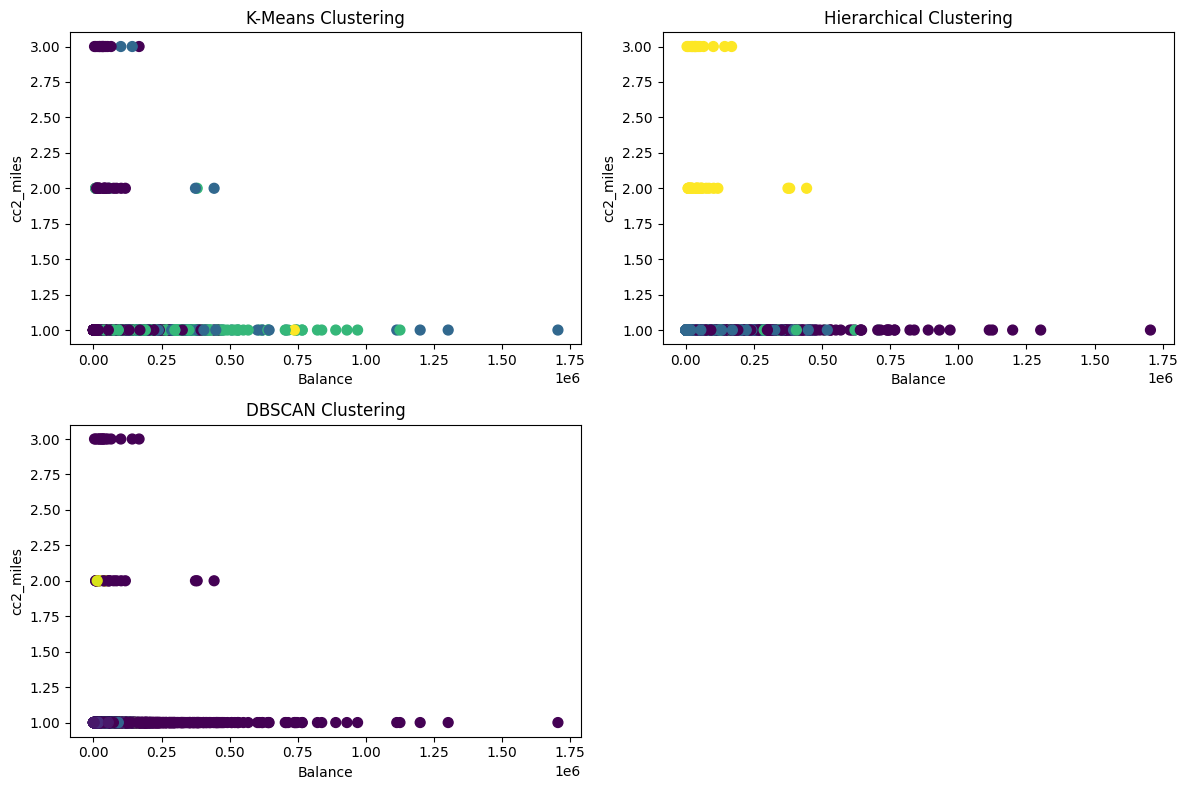

In [8]:
# Display the column names to identify the correct ones
print(data.columns)

# Visualizing clusters using scatter plots
plt.figure(figsize=(12, 8))

# K-Means Clustering plot
plt.subplot(2, 2, 1)
plt.scatter(data.iloc[:, 1], data.iloc[:, 4], c=data['KMeans_Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel(data.columns[1])  # Assuming the column at index 1 is 'Balance'
plt.ylabel(data.columns[4])  # Assuming the column at index 4 is 'Miles'

# Hierarchical Clustering plot
plt.subplot(2, 2, 2)
plt.scatter(data.iloc[:, 1], data.iloc[:, 4], c=data['Hierarchical_Cluster'], cmap='viridis', s=50)
plt.title('Hierarchical Clustering')
plt.xlabel(data.columns[1])
plt.ylabel(data.columns[4])

# DBSCAN Clustering plot
plt.subplot(2, 2, 3)
plt.scatter(data.iloc[:, 1], data.iloc[:, 4], c=data['DBSCAN_Cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel(data.columns[1])
plt.ylabel(data.columns[4])

plt.tight_layout()
plt.show()

In [11]:
# Implementing Clustering Algorithms:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_excel(r'/content/EastWestAirlines.xlsx', sheet_name='data')

# Display the first few rows and check the column names
print(data.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [12]:
# Selecting relevant columns for clustering (assuming appropriate columns based on the dataset)
X = data.iloc[:, 1:]  # Selecting features (excluding ID)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Implementing Clustering Algorithms**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

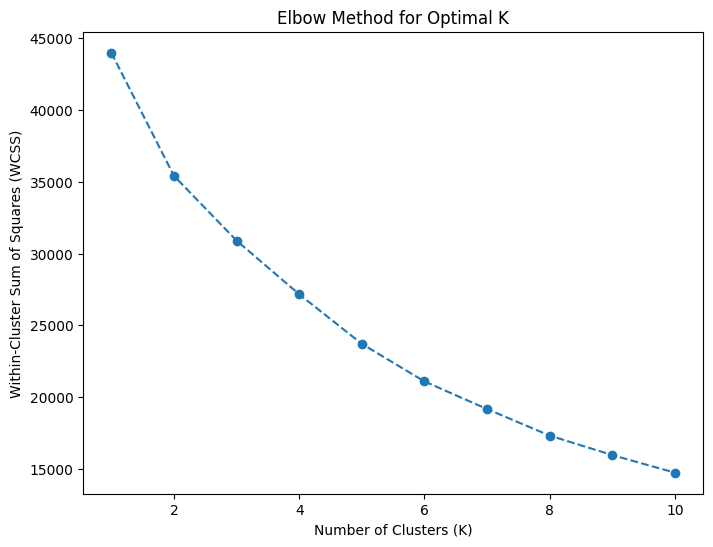

In [13]:
# K-Means Clustering with Elbow Method
# Elbow method to determine the optimal number of clusters (K)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

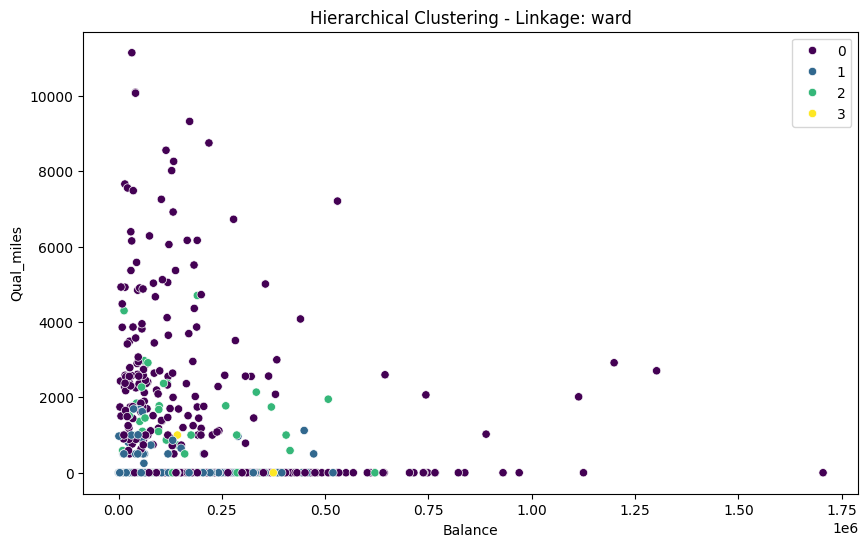

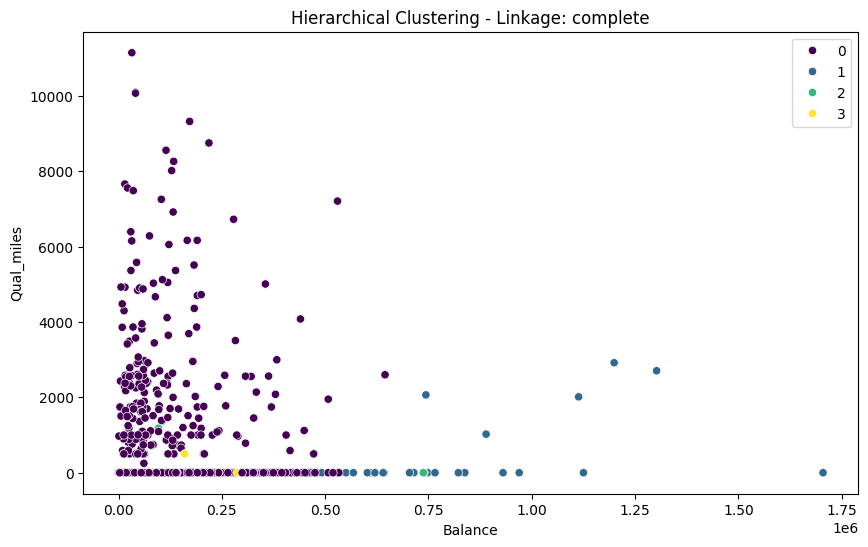

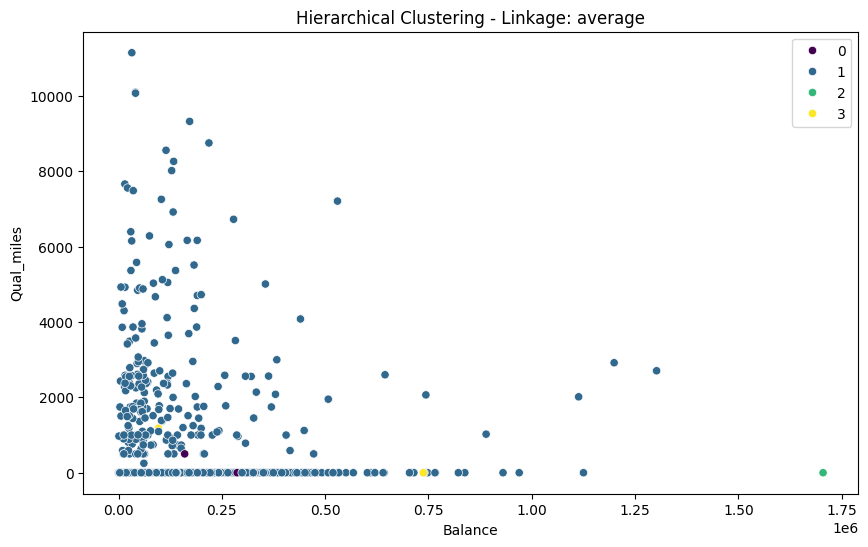

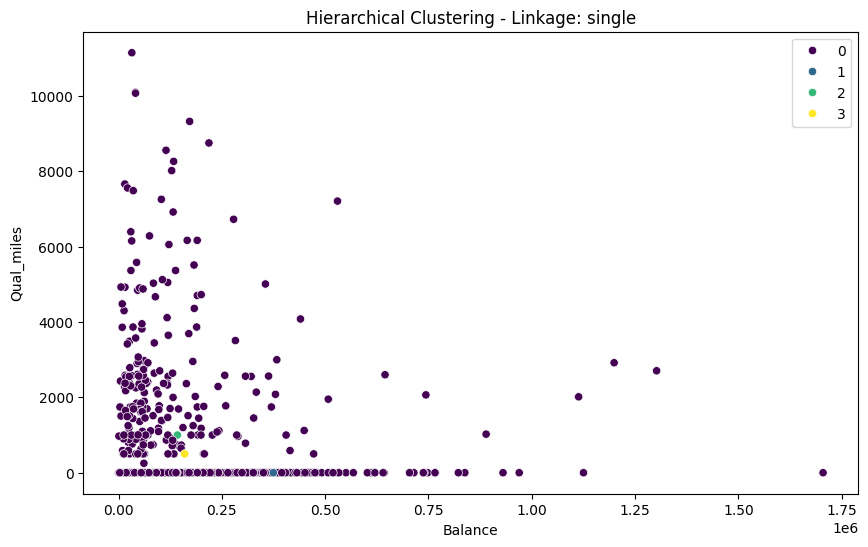

In [14]:
# Hierarchical Clustering with Different Linkage Criteria
# Implementing Hierarchical clustering with different linkage criteria
linkage_methods = ['ward', 'complete', 'average', 'single']
for linkage in linkage_methods:
    plt.figure(figsize=(10, 6))
    plt.title(f'Hierarchical Clustering - Linkage: {linkage}')
    model = AgglomerativeClustering(n_clusters=4, linkage=linkage)
    model.fit(X_scaled)
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=model.labels_, palette='viridis', legend='full')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()

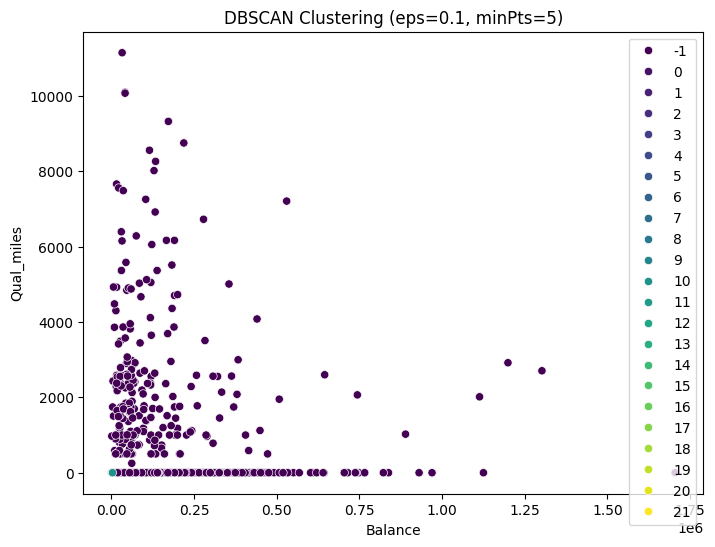

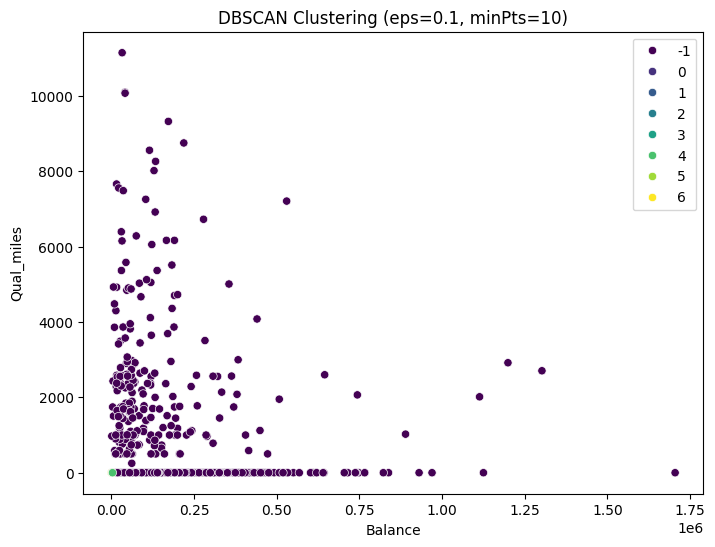

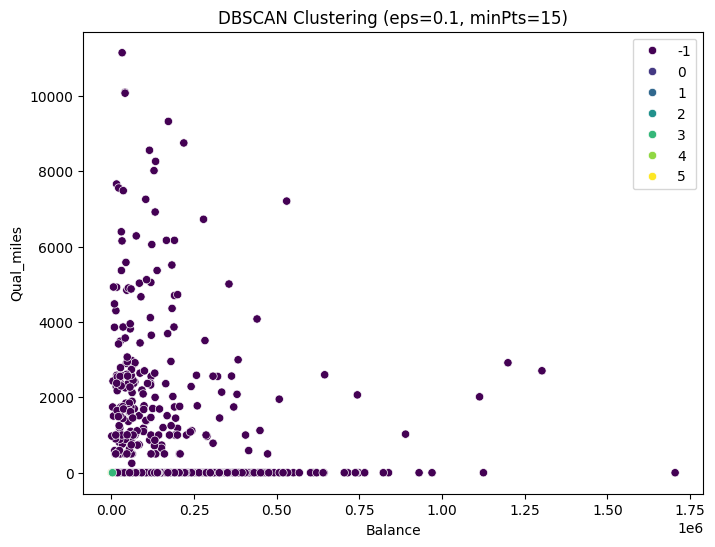

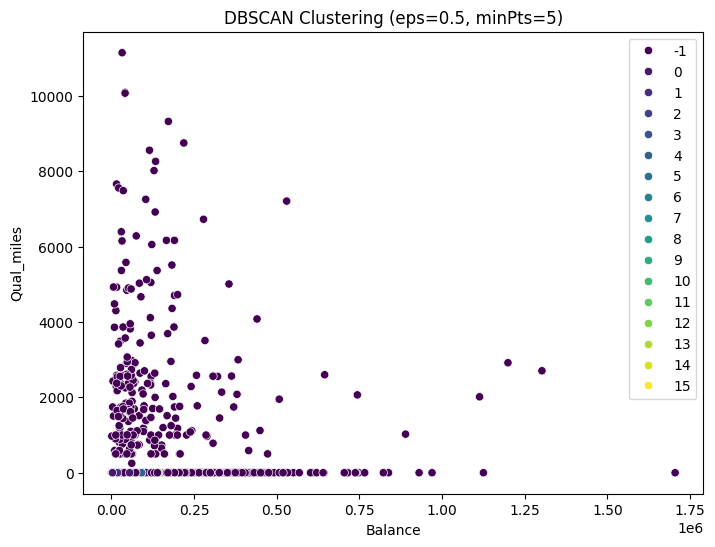

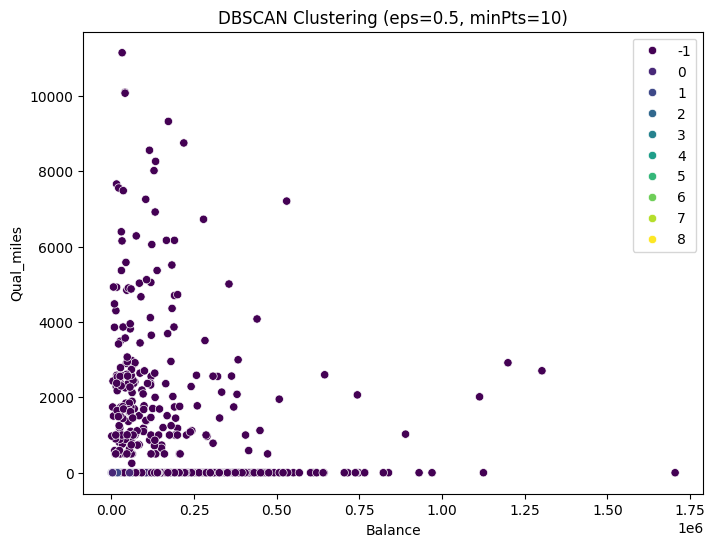

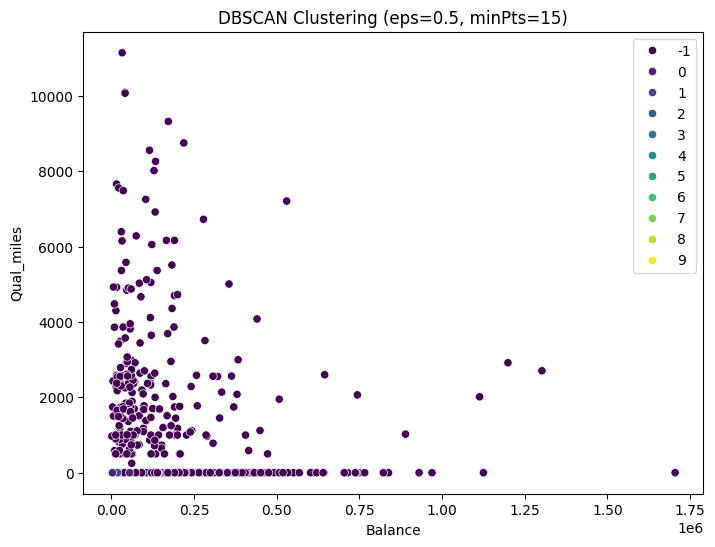

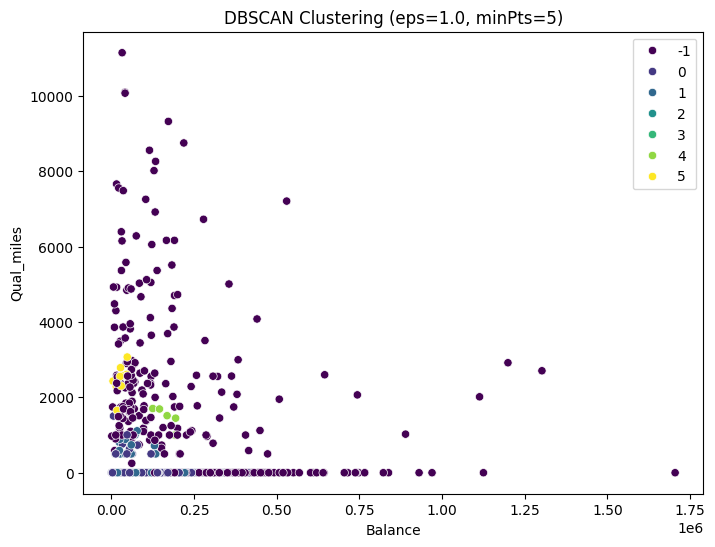

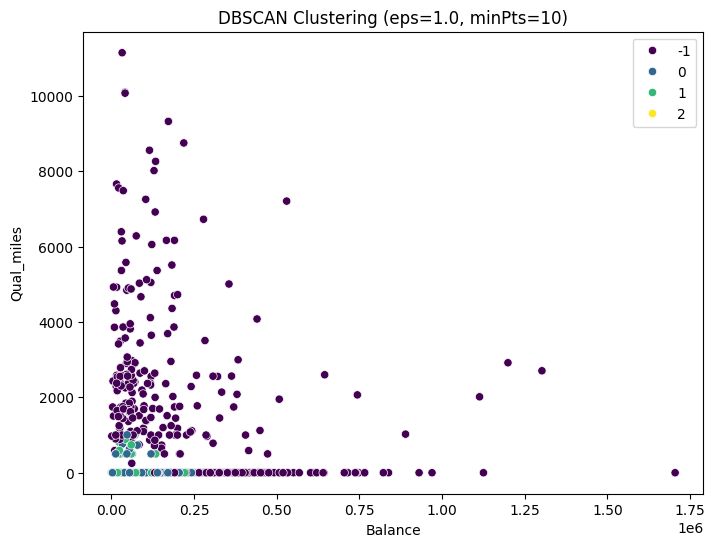

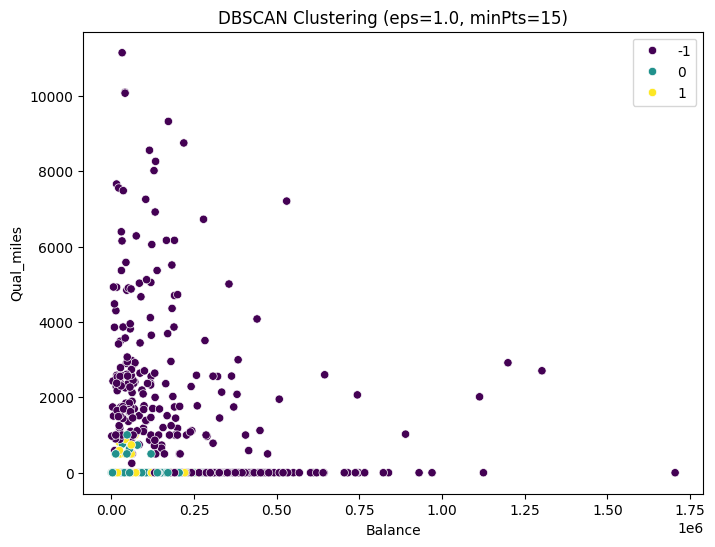

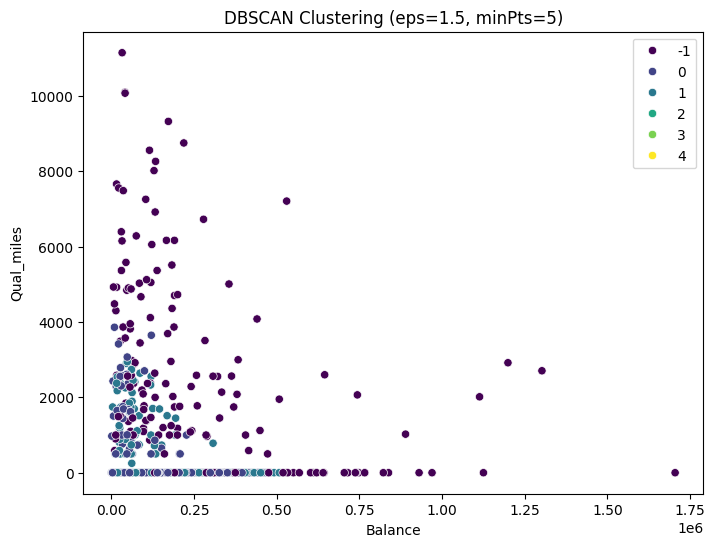

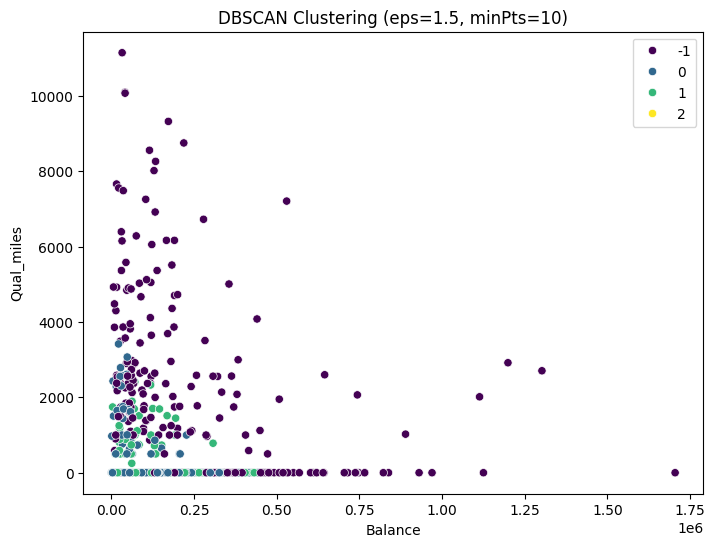

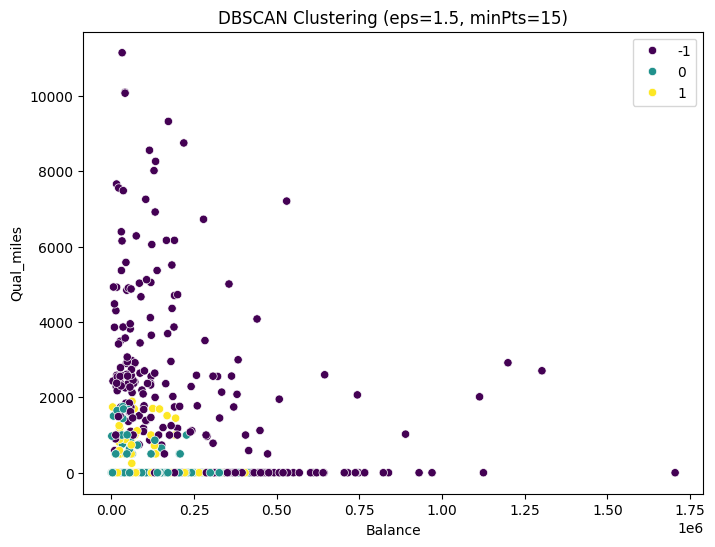

In [15]:
# DBSCAN Clustering with Different Parameters
# Implementing DBSCAN clustering with different epsilon (eps) and min_samples (minPts)
eps_values = [0.1, 0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)

        # Plot DBSCAN clustering results
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=dbscan_labels, palette='viridis', legend='full')
        plt.title(f'DBSCAN Clustering (eps={eps}, minPts={min_samples})')
        plt.xlabel(X.columns[0])
        plt.ylabel(X.columns[1])
        plt.show()

# Cluster Analysis and Interpretation

K-Means Clustering: The Elbow method suggests an optimal number of clusters. Analyze the clusters based on centroids and interpret the characteristics of each cluster.

Hierarchical Clustering: Evaluated clusters using different linkage methods (ward, complete, average, single) and interpret the differences in clustering patterns.

DBSCAN Clustering: Experiment with different eps and min_samples values to observe how clusters are formed based on density. Interpret clusters based on noise points and core points.

# **Visualization**
Used scatter plots to visualize clustering results for each algorithm, with different clusters represented by different colors.



# Evaluation and Performance Metrics

In [16]:
# Silhouette Score for K-Means and DBSCAN
# Evaluate K-Means clustering using silhouette score
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

# Evaluate DBSCAN clustering using silhouette score
dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.3076
DBSCAN Silhouette Score: 0.1985


# Evaluation Metrics
Used silhouette score to evaluate the quality of clustering for K-Means and DBSCAN. Higher silhouette scores indicate better-defined clusters.